In [1]:
import numpy as np
import psychopy
from skimage.external import tifffile
from psychopy.monitors import GammaCalculator
%matplotlib notebook
import matplotlib.pyplot as plt


In [59]:
px = 512
framerate = 30
trial_length = 2
n_trials = 25
offset = 10
trial_frames = framerate * trial_length
lum_values = np.linspace(0, 256, n_trials)

In [67]:

#data = np.random.rand(px, px, framerate*trial_length*n_trials)
avg = np.zeros((n_trials))
for i in range(n_trials):
    data[:,:, 25] = 10
    start = i * trial_frames + offset
    end = (i + 1) * trial_frames - offset
    avg[i] = np.mean(data[:, :, start:end])

In [85]:
avg = np.array([2, 4, 7, 10, 20, 35, 60, 70, 120, 190, 250, 350, 460, 580, 700, 900, 1200, 1600, 2400, 3600, 4900, 
               6300, 9200, 14000, 28000])
avg.shape

(25,)

In [86]:
myfit = GammaCalculator(inputs=lum_values, lums=avg, eq=4)


In [116]:
myfit.a, myfit.k, myfit.b, myfit.gamma

(1.9999899999999999,
 38.351717097350743,
 0.012131679491240588,
 2.6094956483333243)

In [105]:
lum_values2 = np.linspace(0, 1, n_trials)

In [114]:
pridectd = myfit.a + (myfit.b +myfit.k*lum_values2)**myfit.gamma

<IPython.core.display.Javascript object>


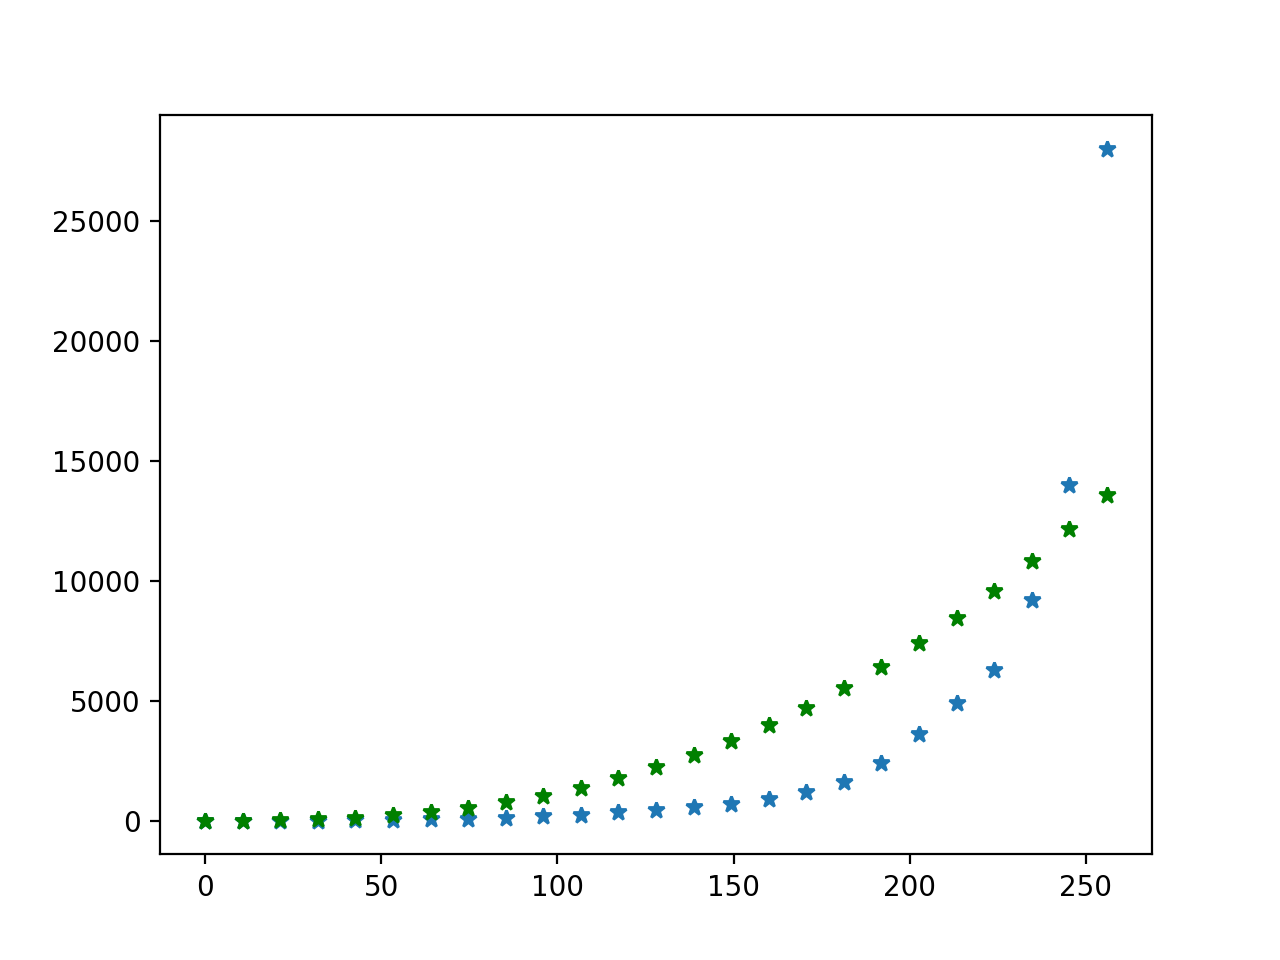

In [115]:
plt.plot(lum_values, avg, '*')
plt.plot(lum_values, pridectd, '*g')